In [38]:
using Plots
using FFTW

L = 100
N = 1000
dx = L/N
dt = 2e-5

x = LinRange(0, L - dx, N)
k = 2*π/L .* collect(1:(N÷2)+1)
k² = k.*k

F = plan_rfft(x)
B = plan_irfft(k.*im, N)

function antialiasing!( F )
    F[end-(N÷6)+1:end] .= 0.
end

function euler!(Fdφ, Fφ, φ)
    Fdφ .= -k² .* (k².*Fφ .- F * (φ .- φ.^3 ))
    Fφ .+= Fdφ.*dt
    antialiasing!(Fφ)
    φ .= B*Fφ
end

euler! (generic function with 1 method)

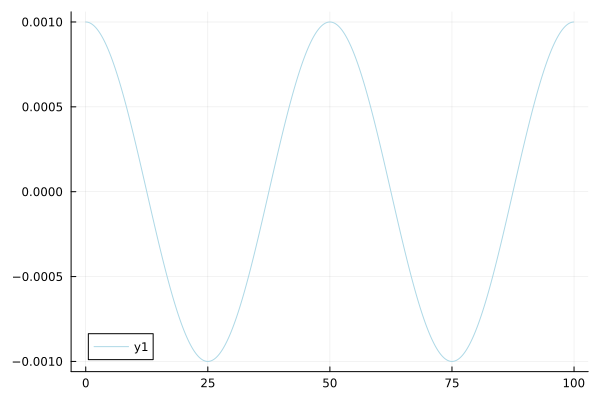

In [41]:
φ = cos.(2  * (2π/L) .* x)  * 0.001

dφ = zeros(N)
Fφ = F*φ 
Fdφ = F*dφ 
c = "lightblue"
p = plot(x, φ, color=c)
display(p)

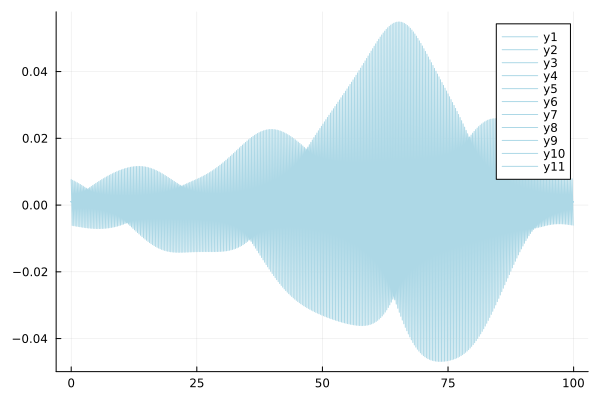

In [42]:
M = 40
p = plot(x, φ, color=c)
for t in 1:M
    euler!(Fdφ, Fφ, φ)
    if t%(M÷10) == 0
        # φ .= B*Fφ
        # print(100*t/M,"% \n")
        plot!(x, φ, color=c)
        @assert !any(isnan.(Fφ))
    end
end
display(p)

In [ ]:
not